In [1]:
import pandas as pd
import numpy as np
import datetime
from scorepi import *
from epiweeks import Week
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import datetime
from datetime import datetime
from datetime import timedelta
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})

# Pull/format data

In [4]:
# download round 17 data

def pull_scenario_modeling_hub_predictions(model,dates):
    """pull_scenario_modeling_hub_predictions. Load predictions of the model saved by the scenario modeling
    hub.

    Parameters
    ----------
    model : str
        Model name on thhe
    dates : list or string
        List of potential dates in the iso format, e.g., 'yyyy-mm-dd', for the submission.
    """
    modeltype = [model, model+'-incdeath', model+'-inchosp', model+'-quantile']
    dftotal = pd.DataFrame()
    for m in modeltype:
        predictions = None
        if isinstance(dates,str):
            dates = [dates]
        for date in dates:
            url = f"https://raw.githubusercontent.com/midas-network/covid19-scenario-modeling-hub/master/data-processed/{model}/{date}-{m}"
            for ext in [".gz.parquet", ".parquet"]:
                try:
                    predictions = pd.read_parquet(url+ext)
                except:
                    pass
                
        if predictions is None:
            print(f"Data for model {m} and date {dates} unavailable")
            continue

        
                
        predictions = predictions[predictions['type'] =='quantile']
        predictions['quantile'] = predictions['type_id']
        
        
        dftotal = pd.concat([dftotal, predictions])  
        
        
    numweeks = list(dftotal.horizon.unique())

    start_date = list(dftotal.origin_date.unique())[0]
    date_1 = pd.to_datetime(start_date)

    alldates = []
    for wk in numweeks:
        if wk==1:
            d = date_1 + timedelta(days=6*int(wk))
        else:
            d = pd.to_datetime("2023-04-22") + timedelta(weeks=int(wk-1))

        alldates.append(d)

    dfdates = pd.DataFrame({'horizon':numweeks, 'target_end_date':alldates})


    dftotal = dftotal.merge(dfdates, how='inner', on='horizon')
    
    #dftotal = dftotal[dftotal.target_end_date <= pd.to_datetime('2023-08-08')]
    
    return dftotal


In [241]:
model = "UVA-adaptive"
dates = ['2023-04-16'] #potential submission dates
predictions = pull_scenario_modeling_hub_predictions(model,dates)

Data for model UVA-adaptive and date ['2023-04-16'] unavailable


In [5]:
#modelsall = ['Ensemble_LOP', 'Ensemble_LOP_untrimmed', 'Ensemble', 'MOBS_NEU-GLEAM_COVID']
modelsall = ['Ensemble_LOP', 'Ensemble_LOP_untrimmed', 'Ensemble', 'MOBS_NEU-GLEAM_COVID', 'JHU_IDD-CovidSP',
             'NotreDame-FRED', 'UTA-ImmunoSEIRS', 'UVA-adaptive']
dates = ['2023-04-16']

# dont need individual modelsh

# models not included:
# pd.read_pickle(f'megaround_wis_{target}_rd{rd}_scenarios.pkl')  only submitted samples (trajectories), no quantiles
# NCSU Covsim only submitted for one state

In [833]:
rd=17

for model in modelsall:
    print(model)
    predictions = pull_scenario_modeling_hub_predictions(model,dates)
    if predictions is not None:
        predictions.to_parquet(f'./dat/{model}_rd{rd}.pq', index=False)


Ensemble_LOP
Data for model Ensemble_LOP-incdeath and date ['2023-04-16'] unavailable
Data for model Ensemble_LOP-inchosp and date ['2023-04-16'] unavailable
Data for model Ensemble_LOP-quantile and date ['2023-04-16'] unavailable
Ensemble_LOP_untrimmed
Data for model Ensemble_LOP_untrimmed-incdeath and date ['2023-04-16'] unavailable
Data for model Ensemble_LOP_untrimmed-inchosp and date ['2023-04-16'] unavailable
Data for model Ensemble_LOP_untrimmed-quantile and date ['2023-04-16'] unavailable
Ensemble
Data for model Ensemble-incdeath and date ['2023-04-16'] unavailable
Data for model Ensemble-inchosp and date ['2023-04-16'] unavailable
Data for model Ensemble-quantile and date ['2023-04-16'] unavailable
MOBS_NEU-GLEAM_COVID
Data for model MOBS_NEU-GLEAM_COVID-incdeath and date ['2023-04-16'] unavailable
Data for model MOBS_NEU-GLEAM_COVID-inchosp and date ['2023-04-16'] unavailable
Data for model MOBS_NEU-GLEAM_COVID-quantile and date ['2023-04-16'] unavailable
JHU_IDD-CovidSP
Data

In [834]:
predictions

,origin_date,scenario_id,location,target,horizon,type,type_id,value,quantile,target_end_date
0,2023-04-16,A-2023-04-16,51,inc hosp,1.0,quantile,0.010,69.000000,0.010,2023-04-22
1,2023-04-16,A-2023-04-16,51,inc hosp,1.0,quantile,0.025,70.000000,0.025,2023-04-22
2,2023-04-16,A-2023-04-16,51,inc hosp,1.0,quantile,0.050,73.000000,0.050,2023-04-22
3,2023-04-16,A-2023-04-16,51,inc hosp,1.0,quantile,0.100,84.000000,0.100,2023-04-22
4,2023-04-16,A-2023-04-16,51,inc hosp,1.0,quantile,0.150,86.850000,0.150,2023-04-22
...,...,...,...,...,...,...,...,...,...,...
3731515,2023-04-16,F-2023-04-16,US,inc death,260.0,quantile,0.850,1029.298298,0.850,2028-04-08
3731516,2023-04-16,F-2023-04-16,US,inc death,260.0,quantile,0.900,1067.867280,0.900,2028-04-08
3731517,2023-04-16,F-2023-04-16,US,inc death,260.0,quantile,0.950,1162.072189,0.950,2028-04-08
3731518,2023-04-16,F-2023-04-16,US,inc death,260.0,quantile,0.975,1238.570384,0.975,2028-04-08


In [6]:
rd = 17
start_week = Week(2023,16)
end_week = Week(2023,31)
#max_date = datetime.datetime(2023, 8, 9)
#models = ["Ensemble","Ensemble_LOP","Ensemble_LOP_untrimmed", 'MOBS_NEU-GLEAM_COVID']

models = modelsall

predictions_rd17 = pd.DataFrame()
for model in models:
    fil = Path(f'./dat/{model}_rd{rd}.pq')
    if fil.is_file():
    
        predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

        predictions['Model'] = model
        
    
        predictions_rd17 = pd.concat([predictions_rd17, predictions])

In [7]:
predictions_rd17

,scenario_id,target,horizon,origin_date,location,value,type,type_id,quantile,target_end_date,Model
0,A-2023-04-16,cum death,1.0,2023-04-16,01,5.274152,quantile,0.01,0.01,2023-04-22,Ensemble_LOP
1,A-2023-04-16,cum death,1.0,2023-04-16,01,6.391137,quantile,0.025,0.025,2023-04-22,Ensemble_LOP
2,A-2023-04-16,cum death,1.0,2023-04-16,01,7.793234,quantile,0.05,0.05,2023-04-22,Ensemble_LOP
3,A-2023-04-16,cum death,1.0,2023-04-16,01,10.222658,quantile,0.1,0.1,2023-04-22,Ensemble_LOP
4,A-2023-04-16,cum death,1.0,2023-04-16,01,12.817310,quantile,0.15,0.15,2023-04-22,Ensemble_LOP
...,...,...,...,...,...,...,...,...,...,...,...
3731515,F-2023-04-16,inc death,260.0,2023-04-16,US,1029.298298,quantile,0.85,0.85,2028-04-08,UVA-adaptive
3731516,F-2023-04-16,inc death,260.0,2023-04-16,US,1067.867280,quantile,0.9,0.9,2028-04-08,UVA-adaptive
3731517,F-2023-04-16,inc death,260.0,2023-04-16,US,1162.072189,quantile,0.95,0.95,2028-04-08,UVA-adaptive
3731518,F-2023-04-16,inc death,260.0,2023-04-16,US,1238.570384,quantile,0.975,0.975,2028-04-08,UVA-adaptive


In [401]:
# pull death data

surveillance_deaths = pd.read_csv("./dat/State_Custom_Data.csv")
surveillance_deaths = surveillance_deaths[(surveillance_deaths['AGE GROUP']=="All")]
surveillance_deaths['year'] = surveillance_deaths['WEEK'].apply(lambda key: 2022 if (key <=53 and key>=40) else 2023)
surveillance_deaths['end_date'] = surveillance_deaths.apply(lambda row: Week(row['year'],row['WEEK']).enddate(), axis=1)
surveillance_deaths['state_name'] = surveillance_deaths['SUB AREA']
#surveillance_deaths = surveillance_deaths[surveillance_deaths.state_name.isin(gleam.state_name.unique())]
surveillance_deaths = surveillance_deaths[['state_name',"end_date",'NUM COVID-19 DEATHS']].rename(columns = {"NUM COVID-19 DEATHS":"value",
                                                                     'end_date':'date'})
surveillance_deaths = surveillance_deaths[surveillance_deaths['value']!='Insufficient Data']
surveillance_deaths['value'] = surveillance_deaths['value'].astype(int)
surveillance_deaths = surveillance_deaths[surveillance_deaths.state_name != 'New York City']
surveillance_deaths = surveillance_deaths.rename(columns={'state_name': 'location_name'})

In [402]:
surv_death = surveillance_deaths.merge(locations, how='inner', on='location_name')

In [403]:
surv_death['location'] = surv_death['location'].astype(str)

In [404]:
surv_death.to_parquet(f'./dat/truth_inc_death_new.pq', index=False)

In [497]:
surv_death

,location_name,date,value,abbreviation,location,population
0,Alabama,2022-10-08,24,AL,1,4903185
1,Alabama,2022-10-15,20,AL,1,4903185
2,Alabama,2022-10-22,20,AL,1,4903185
3,Alabama,2022-10-29,33,AL,1,4903185
4,Alabama,2022-11-05,22,AL,1,4903185
...,...,...,...,...,...,...
2127,Wyoming,2023-06-24,0,WY,56,578759
2128,Wyoming,2023-07-01,1,WY,56,578759
2129,Wyoming,2023-07-08,1,WY,56,578759
2130,Wyoming,2023-07-15,1,WY,56,578759


In [504]:
for date in surv_death.date.unique():
    df = surv_death[surv_death.date == date]
    
    val = df.value.sum()
    
    newrow = pd.DataFrame({'location_name': 'United States', 'date':date, 'value':val, 'abbreviation':'US', 
                          'location': 'US', 'population':df.population.sum()}, index=[0])
    
    surv_death = pd.concat([surv_death, newrow])

In [506]:
surv_death.to_parquet(f'./dat/truth_inc_death_new.pq', index=False)

# Analysis

In [389]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

fontsize=14
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{lmodern}\usepackage{sfmath}')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('axes', labelsize=fontsize)
color = '#17B1BF'

import matplotlib.dates as mdates
def set_date_axis_fmt(ax):
    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format
    fmt = mdates.DateFormatter('%b %y')

    X = ax.xaxis
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)
    
def set_date_axis_fmt_small(ax):
    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format
    fmt = mdates.DateFormatter('%b ')

    X = ax.xaxis
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)

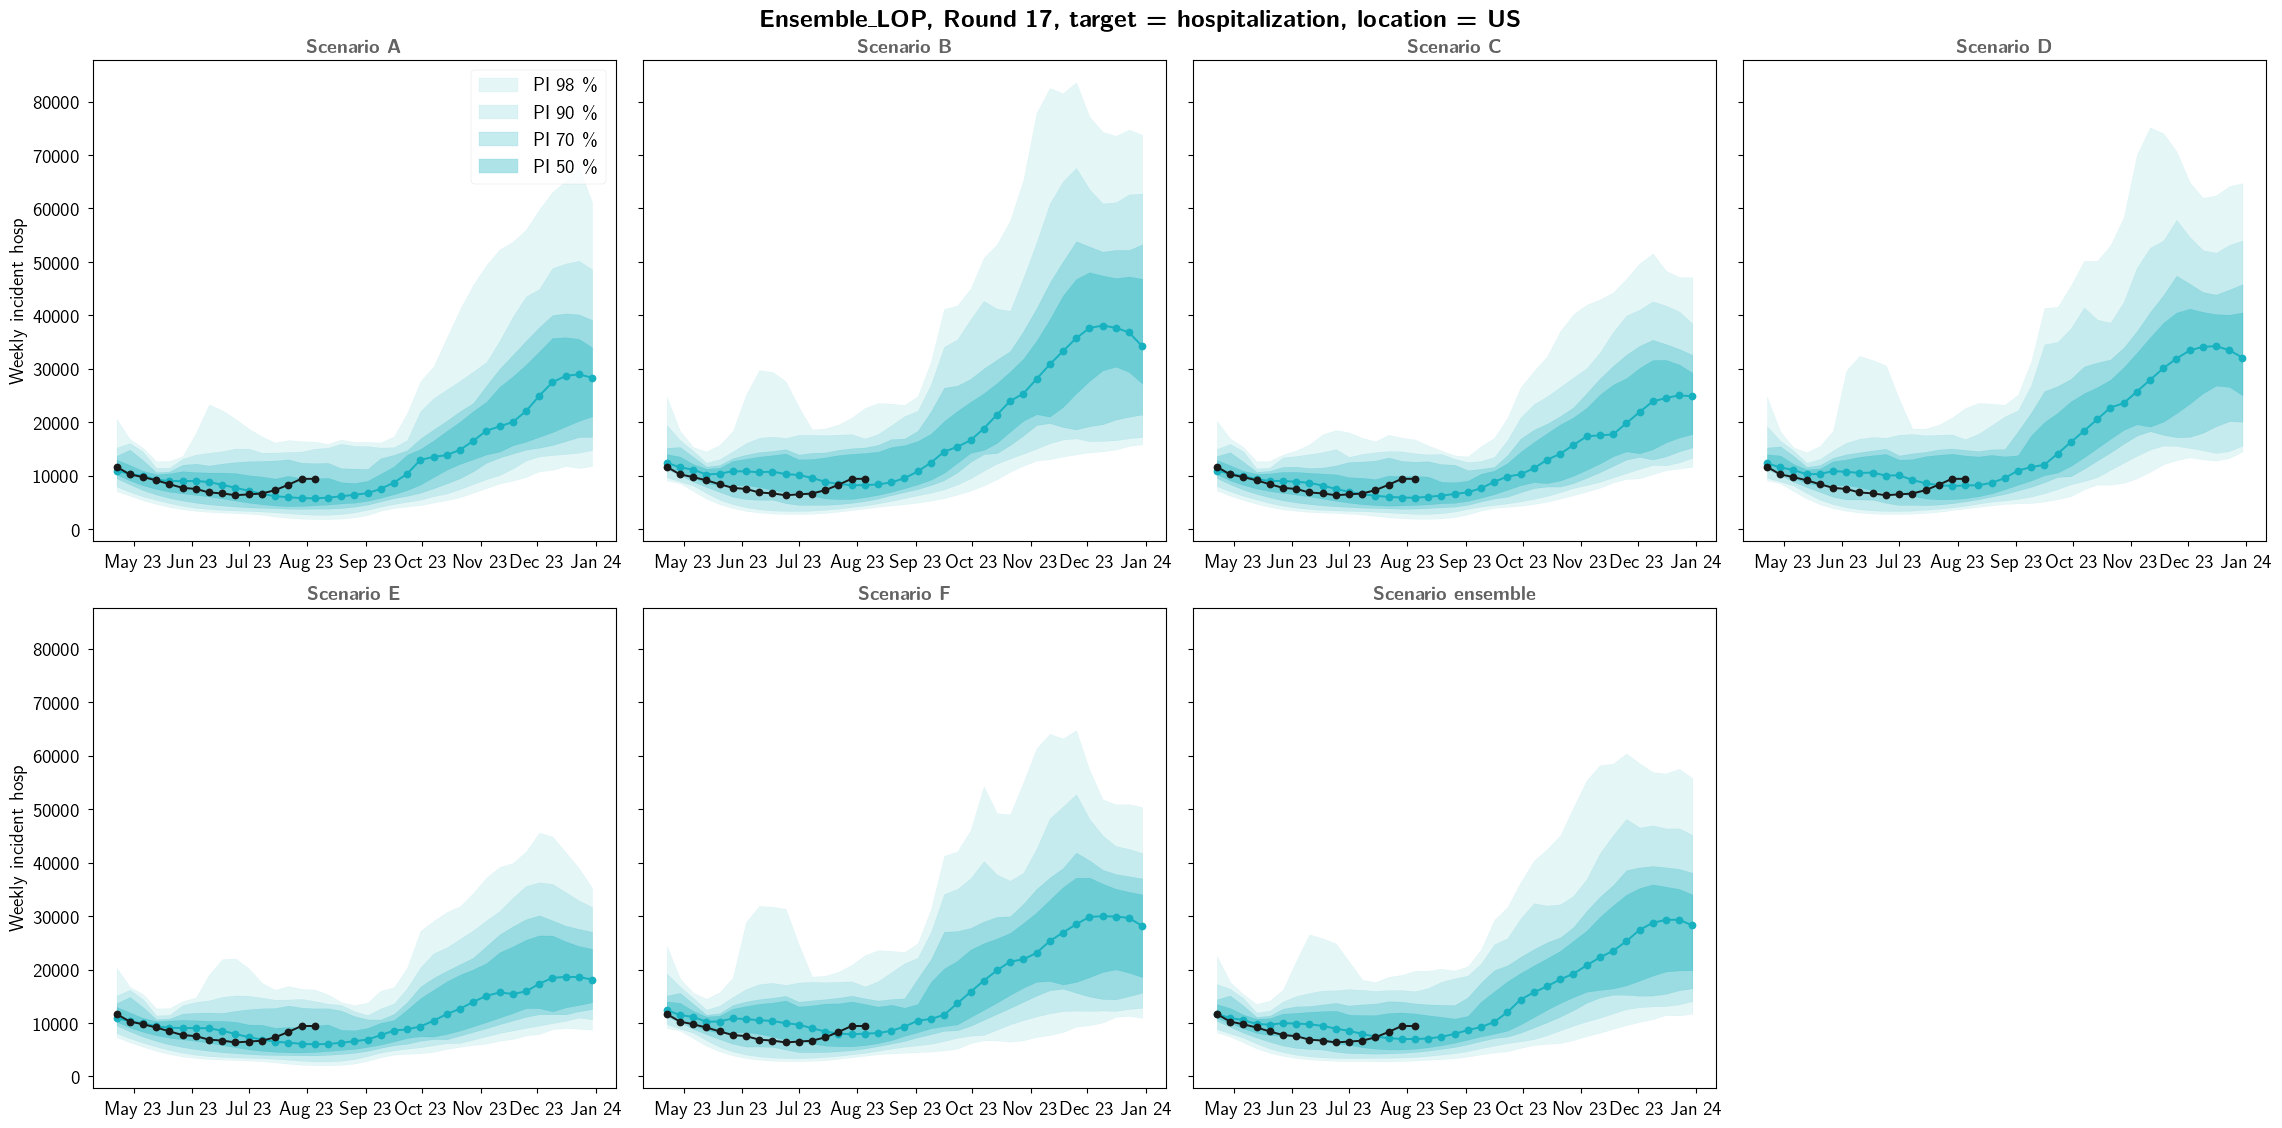

In [776]:

#model = "Ensemble"
model = 'Ensemble_LOP'
rd=17
predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

#start_week = Week(2022,2)
#end_week = Week(2022,13)
max_date_surve = pd.to_datetime('2023-08-05')

max_date_pred = pd.to_datetime('2024-01-01')

map_alpha = lambda interval_range: 0.5 * (1-interval_range) + 0.1

predictions["scenario_letter"] = predictions.scenario_id.str[0]
predictions.drop(predictions[predictions.type == 'point'].index, inplace=True)

incidence = True
target = 'hosp'
target_location = 'US'

if target == 'hosp':
    target_obs = 'hospitalization'
elif target == 'death':
    target_obs = 'death_new'
else:
    target_obs = target
observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
observations['date'] = pd.to_datetime(observations['date'])

#filter start - end week
observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                            (observations['date'] <= pd.to_datetime(end_week.enddate()))]


    
#filter location
observations = observations[observations['location'] == target_location]

#aggregate to weekly
observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

if max_date_surve:
    observations = observations[observations['date'] <= max_date_surve].copy()

#transform to Observation object
observations = Observations(observations)

target_prediction_list = [f"{'inc' if incidence else 'cum'} {target}" ]

predictions = predictions[predictions.location == target_location]
predictions = predictions[(predictions['target'].isin(target_prediction_list))]

if max_date_pred:
    predictions = predictions[predictions['target_end_date'] <= max_date_pred]

if len(predictions) == 0:
    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

scenarios = list(predictions['scenario_letter'].drop_duplicates())
predictions_list = [Predictions(predictions[predictions['scenario_letter'] == scenario], t_col='target_end_date') for scenario in scenarios]
            
med_ensemble_predictions = median_ensemble(predictions_list)
#ex_ensemble_predictions = extreme_ensemble(predictions_list)
predictions_list += [med_ensemble_predictions]
labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Scenario ensemble"]
# print(labels)

width = 7.057*3.25
height = width/2
fig, axes = plt.subplots(2,4, figsize=(width, height), sharey=True)
plt.subplots_adjust(left=0.07, bottom=0.08, right=0.99, top=0.85, wspace=0.1,
                    hspace=0.4)
fig.suptitle(r"\textbf"+"{"+f"{model}, Round {rd}, target = {target_obs}, location = {target_location}"+"}", fontsize=fontsize+4)
for ind,(predictions,label) in enumerate(zip(predictions_list,labels)):
    i = ind // 4
    j = ind % 4
    
    #title
    axes[i][j].set_title(r"\textbf"+"{"+f"{label}"+"}", fontsize=fontsize, color='#636363')

    t = np.unique(predictions.get_t())

    #intervals
    intervals = [(0.01,0.99),(0.05,0.95),(.15, .85),(0.25,0.75)]
    #intervals = [(.35, .65)]
    for interval in intervals:
        q_low,q_upp = interval
        interval_range = q_upp - q_low
        alpha = map_alpha(interval_range)
        pred_low = predictions.get_quantile(q_low)
        pred_upp = predictions.get_quantile(q_upp)
        axes[i][j].fill_between(t,pred_upp,pred_low, color=color, alpha=alpha,
                               label=fr"PI {int(round(interval_range*100))} \%")
    if i == 0 and j == 0:
        axes[i][j].legend(frameon=True, fontsize=fontsize)

    #point estimate
    pred_point = predictions.get_point()
    if len(pred_point) > 0:
        axes[i][j].plot(t,pred_point,'-o',color=color)
    
    #plot surveillance
    axes[i][j].plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a')
    
    #set x axis
    set_date_axis_fmt(axes[i][j])
    

    #set y axis 
    axes[i][0].set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}")
    
    
#path = f"./figs/rd{rd}/{'inc' if incidence else 'cum'}_{target}/{target_loc_name}/"
#Path(path).mkdir(parents=True, exist_ok=True)

#plt.savefig('lop_ensemble_test.pdf')
fig.delaxes(axes[1][3])
plt.tight_layout()

#plt.savefig('megaround_lop_hosp.pdf')
plt.show()

In [370]:
from matplotlib.gridspec import GridSpec

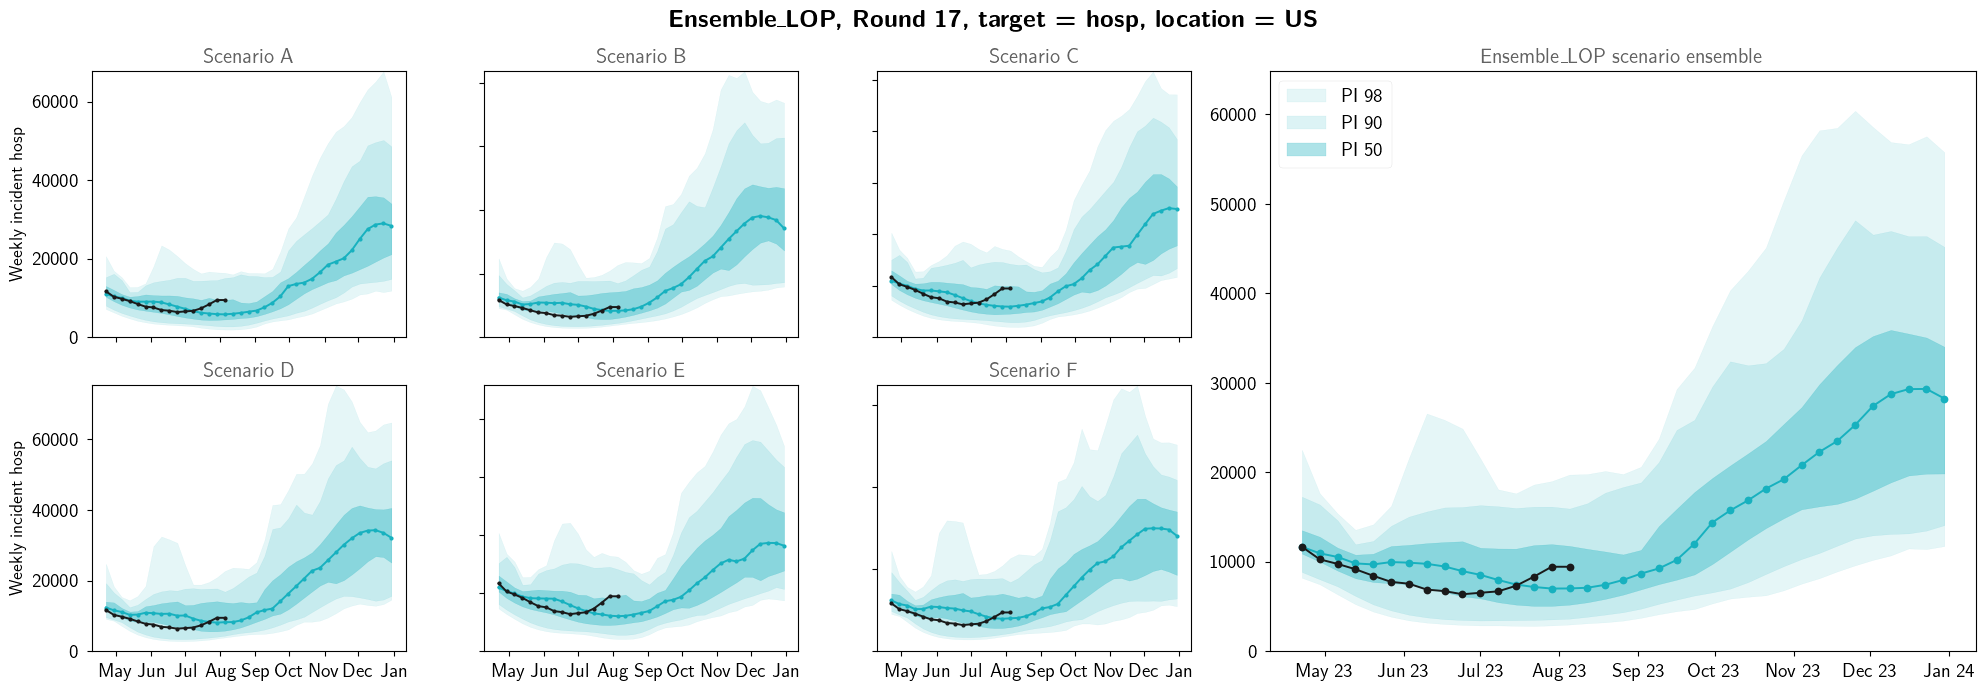

In [777]:
labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ['Scenario Ensemble']
intervals = [(0.01,0.99),(0.05,0.95),(0.25,0.75)]

# Setting up the plot surface
fig = plt.figure(figsize=(20, 7))
gs = GridSpec(nrows=2, ncols=5)
# First axes

inds = [[0,0], [0,1],[0,2], [1,0], [1,1],[1,2], [2,2]]
for ind,(predictions,label) in enumerate(zip(predictions_list,labels)):
    
    #i = ind // 3
    #j = ind % 3
    if label == 'Scenario Ensemble':
        ax0 = fig.add_subplot(gs[:, 3:])
        
        #title
        ax0.set_title(f"{model} scenario ensemble", fontsize=fontsize+1, color='#636363')

        t = np.unique(predictions.get_t())

        #intervals
        for interval in intervals:
            q_low,q_upp = interval
            interval_range = q_upp - q_low
            alpha = map_alpha(interval_range)
            pred_low = predictions.get_quantile(q_low)
            pred_upp = predictions.get_quantile(q_upp)
            ax0.fill_between(t,pred_upp,pred_low, color=color, alpha=alpha,
                                   label=fr"PI {int(round(interval_range*100))} %")
        #if i == 0 and j == 0:
        #    axes[i][j].legend(frameon=True, fontsize=fontsize)

        #point estimate
        pred_point = predictions.get_point()
        if len(pred_point) > 0:
            ax0.plot(t,pred_point,'-o',color=color)

        #plot surveillance
        ax0.plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a')

        #set x axis
        set_date_axis_fmt(ax0)

        ax0.legend(frameon=True, fontsize=fontsize, loc='upper left')

        #set y axis 
       # ax0.set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}", fontsize=13)
       # ax0.tick_params(labelsize=12)
       # ax0.set(yticklabels=[])
        ax0.set_ylim([0,maxi+100])
    else:
        i = inds[ind][0]
        j = inds[ind][1]

        ax0 = fig.add_subplot(gs[i, j])

        #title
        ax0.set_title(f"{label}", fontsize=fontsize+1, color='#636363')

        t = np.unique(predictions.get_t())

        #intervals
        for interval in intervals:
            q_low,q_upp = interval
            interval_range = q_upp - q_low
            alpha = map_alpha(interval_range)
            pred_low = predictions.get_quantile(q_low)
            pred_upp = predictions.get_quantile(q_upp)
            ax0.fill_between(t,pred_upp,pred_low, color=color, alpha=alpha,
                                   label=fr"PI {int(round(interval_range*100))} %")
            if q_upp == 0.99:
                maxi = max(pred_upp)
        #if i == 0 and j == 0:
        #    axes[i][j].legend(frameon=True, fontsize=fontsize)

        #point estimate
        pred_point = predictions.get_point()
        if len(pred_point) > 0:
            ax0.plot(t,pred_point,'-o',markersize=3,color=color)

        #plot surveillance
        ax0.plot(observations.get_t(),observations.get_value(), '-o',markersize=3, color='#1a1a1a')

        #set x axis
       # set_date_axis_fmt(ax0)


        #set y axis 
        if j == 0:
            ax0.set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}", fontsize=13)
        #    ax0.set(yticklabels=[])
            
        else:
            ax0.set(yticklabels=[])
            
            
        if i == 0:
            #ax0.set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}", fontsize=13)
            ax0.set(xticklabels=[])
            
        else:
            set_date_axis_fmt_small(ax0)
                    
        ax0.set_ylim([0,maxi+100])
       # ax0.tick_params(labelsize=12)

#fig.suptitle(f"{model}, Round {rd}, target = {target_obs}, location = {target_loc_name}", fontsize=fontsize+4) 

fig.suptitle(r"\textbf"+"{"+f"{model}, Round {rd}, target = {target}, location = {target_location}"+"}", fontsize=fontsize+4)

plt.tight_layout()
#plt.savefig("megaround_mobs_death.pdf")
plt.show()



In [558]:
location_mapping = {}
for loc in locations['location']:
    if loc != 'US':
        if int(loc) < 10:
            locnew = '0' + loc
            location_mapping[locnew] = locations[locations['location'] == loc]['abbreviation'].unique()[0]
        else:
            location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]
    else:
        location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]
            


In [495]:
# to make these plots for all states

model = 'MOBS_NEU-GLEAM_COVID'
rd=17
predictionsall = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

#start_week = Week(2022,2)
#end_week = Week(2022,13)
max_date_surve = pd.to_datetime('2023-08-01')

max_date_pred = pd.to_datetime('2024-01-01')

map_alpha = lambda interval_range: 0.5 * (1-interval_range) + 0.1

predictionsall["scenario_letter"] = predictionsall.scenario_id.str[0]
predictionsall.drop(predictionsall[predictionsall.type == 'point'].index, inplace=True)

incidence = True
target = 'hosp'
#target_location = 'US'

if target == 'hosp':
    target_obs = 'hospitalization'
elif target == 'death':
    target_obs = 'death_new'
else:
    target_obs = target
    
loclist = list(predictionsall.location.unique())
loclist.remove('US')

#loclist2=['12']
for loc in loclist:
    target_location = loc
    
    
    observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
    observations['date'] = pd.to_datetime(observations['date'])



    #filter start - end week
    observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                                (observations['date'] <= pd.to_datetime(end_week.enddate()))]



    #filter location
    observations = observations[observations['location'] == target_location]

    #aggregate to weekly
    observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

    if max_date_surve:
        observations = observations[observations['date'] <= max_date_surve].copy()

    #transform to Observation object
    observations = Observations(observations)

    target_prediction_list = [f"{'inc' if incidence else 'cum'} {target}" ]

    pred = predictionsall[predictionsall.location == target_location]
    pred = pred[(pred['target'].isin(target_prediction_list))]

    if max_date_pred:
        pred = pred[pred['target_end_date'] <= max_date_pred]

    if len(pred) == 0:
        raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

    scenarios = list(pred['scenario_letter'].drop_duplicates())
    predictions_list = [Predictions(pred[pred['scenario_letter'] == scenario], t_col='target_end_date') for scenario in scenarios]

    med_ensemble_predictions = median_ensemble(predictions_list)
    #ex_ensemble_predictions = extreme_ensemble(predictions_list)
    predictions_list += [med_ensemble_predictions]
    labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Scenario ensemble"]
    # print(labels)


    labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ['Scenario Ensemble']
    intervals = [(0.01,0.99),(0.05,0.95),(0.25,0.75)]

    # Setting up the plot surface
    fig = plt.figure(figsize=(20, 7))
    gs = GridSpec(nrows=2, ncols=5)
    # First axes

    inds = [[0,0], [0,1],[0,2], [1,0], [1,1],[1,2], [2,2]]
    for ind,(predictions,label) in enumerate(zip(predictions_list,labels)):

        #i = ind // 3
        #j = ind % 3
        if label == 'Scenario Ensemble':
            ax0 = fig.add_subplot(gs[:, 3:])

            #title
            ax0.set_title(f"{model} scenario ensemble", fontsize=fontsize+1, color='#636363')

            t = np.unique(predictions.get_t())

            #intervals
            for interval in intervals:
                q_low,q_upp = interval
                interval_range = q_upp - q_low
                alpha = map_alpha(interval_range)
                pred_low = predictions.get_quantile(q_low)
                pred_upp = predictions.get_quantile(q_upp)
                ax0.fill_between(t,pred_upp,pred_low, color=color, alpha=alpha,
                                       label=fr"PI {int(round(interval_range*100))} %")
            #if i == 0 and j == 0:
            #    axes[i][j].legend(frameon=True, fontsize=fontsize)

            #point estimate
            pred_point = predictions.get_point()
            if len(pred_point) > 0:
                ax0.plot(t,pred_point,'-o',color=color)

            #plot surveillance
            ax0.plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a')

            #set x axis
            set_date_axis_fmt(ax0)

            ax0.legend(frameon=True, fontsize=fontsize, loc='upper left')

            #set y axis 
           # ax0.set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}", fontsize=13)
           # ax0.tick_params(labelsize=12)
           # ax0.set(yticklabels=[])
            ax0.set_ylim([0,maxi+100])
        else:
            i = inds[ind][0]
            j = inds[ind][1]

            ax0 = fig.add_subplot(gs[i, j])

            #title
            ax0.set_title(f"{label}", fontsize=fontsize+1, color='#636363')

            t = np.unique(predictions.get_t())

            #intervals
            for interval in intervals:
                q_low,q_upp = interval
                interval_range = q_upp - q_low
                alpha = map_alpha(interval_range)
                pred_low = predictions.get_quantile(q_low)
                pred_upp = predictions.get_quantile(q_upp)
                ax0.fill_between(t,pred_upp,pred_low, color=color, alpha=alpha,
                                       label=fr"PI {int(round(interval_range*100))} %")
                if q_upp == 0.99:
                    maxi = max(pred_upp)
            #if i == 0 and j == 0:
            #    axes[i][j].legend(frameon=True, fontsize=fontsize)

            #point estimate
            pred_point = predictions.get_point()
            if len(pred_point) > 0:
                ax0.plot(t,pred_point,'-o',color=color)

            #plot surveillance
            ax0.plot(observations.get_t(),observations.get_value(), '-o', color='#1a1a1a')

            #set x axis
           # set_date_axis_fmt(ax0)


            #set y axis 
            if j == 0:
                ax0.set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}", fontsize=13)
            #    ax0.set(yticklabels=[])

            else:
                ax0.set(yticklabels=[])


            if i == 0:
                #ax0.set_ylabel(f"Weekly {'incident' if incidence else 'cumulative'} {target}", fontsize=13)
                ax0.set(xticklabels=[])

            else:
                set_date_axis_fmt_small(ax0)

            ax0.set_ylim([0,maxi+100])
           # ax0.tick_params(labelsize=12)

    #fig.suptitle(f"{model}, Round {rd}, target = {target_obs}, location = {target_loc_name}", fontsize=fontsize+4) 

    fig.suptitle(r"\textbf"+"{"+f"{model}, Round {rd}, target = {target}, location = {location_mapping[target_location]}"+"}", fontsize=fontsize+4)

    plt.tight_layout()
    plt.savefig(f"./figs/megaround_states/megaround_{location_mapping[target_location]}_hosp.pdf")
    plt.show()


## calculate WIS for weeks observed

In [871]:
# regular wis, not normalized/rescaled

target = 'hosp'
ind = 0

predrd = predictions_rd17


# regular wis, not normalized/rescaled

median_ensembles = dict()


#predsall = [predictions_rd5]
ind = 0


rd = 17

start_week = Week(2023,16)
end_week = Week(2023,31)
max_date = pd.to_datetime('2023-08-04')

ind += 1


models = list(predrd.Model.unique())

for target in ['hosp']:
#for target in [ 'hosp']:


    #models = list(predrd.Model.unique())

    median_ensembles = dict()

    df = pd.DataFrame(columns=['Model', 'WIS','Location',  'Label'])

    #loclist2 = ['02']
    for l in loclist:

        median_ensembles[l] = {}


        incidence = True
        target_location = l


        if target == 'hosp':
            target_obs = 'hospitalization'
        elif target == 'death':
            target_obs = 'death_new'
        else:
            target_obs = target

        observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
        observations['date'] = pd.to_datetime(observations['date'])

        #filter start - end week
        observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                                (observations['date'] <= pd.to_datetime(end_week.enddate()))]


        #filter location
       # if int(target_location)<10:
        #    observations = observations[observations['location'] == target_location[1]]
        #else:
           # observations = observations[observations['location'] == target_location]
            
        observations = observations[observations['location'] == target_location]

        #aggregate to weekly
        observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

        if max_date:
            observations = observations[observations['date'] <= max_date].copy()

        #transform to Observation object
        observations = Observations(observations)


        max_pred = observations.date.unique()[-1]

        locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
        location_mapping = dict()
        for loc in locations['location']:
            location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]


        target_prediction_list = [f"{'inc' if incidence else 'cum'} {target}"]

        for model in models:    
            try:
                predictions = predrd[predrd.Model == model]
                predictions['target_end_date'] = pd.to_datetime(predictions['target_end_date'])
                predictions = predictions[predictions.location != 'US']
                predictions = predictions.astype({'location':'int'})
                predictions = predictions.astype({'quantile':'float'})


                locations = locations[locations.location != 'US']
                locations = locations.astype({'location':'int'})

                predictions = predictions.merge(locations, how='inner', on='location')

                target_locations = int(target_location)

                pred = predictions[predictions['location'] == int(target_location)].copy()

                #filter target
                pred = pred[(pred['target'].isin(target_prediction_list))]

                #filter max date
                if max_pred:
                    pred = pred[pred['target_end_date'] <= max_pred]

                if len(pred) == 0:
                    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

                scenarios = list(pred['scenario_id'].drop_duplicates())
                predictions_list = [Predictions(pred[pred['scenario_id'] == scenario], t_col='target_end_date') for scenario in scenarios]
                med_ensemble_predictions = median_ensemble(predictions_list)
                median_ensembles[l][model] = med_ensemble_predictions

                predictions_list += [med_ensemble_predictions]

                labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Median aggregate"]


                aggregated_scores = dict()

                for label,predictions in zip(labels,predictions_list):
                    d,_ = score_utils.all_scores_from_df(observations, predictions, mismatched_allowed=False)


                    aggregated_scores[label] = d

                aggregated_data = defaultdict(list)
                for label in ["Median aggregate"]:
                    aggregated_data['Case'] += [label]
                    aggregated_data['WIS'] += [aggregated_scores[label]['wis_mean']]

                    agg_data_df = pd.DataFrame(aggregated_data)
                    agg_data_df['Model'] = model
                    wisval = agg_data_df.WIS[0]



                locname = list(pred.location_name.unique())[0]


                new_row = {'Model':model, 'WIS':wisval,'Location': locname,  'Label':label, 'Target':target}

                df = df.append(new_row, ignore_index=True)


            except Exception as e:
                print(e) 


There are no predictions for model UTA-ImmunoSEIRS at location 11


In [872]:
df

,Model,WIS,Location,Label,Target
0,Ensemble_LOP,17.631698,Alabama,Median aggregate,hosp
1,Ensemble_LOP_untrimmed,20.195606,Alabama,Median aggregate,hosp
2,Ensemble,14.488364,Alabama,Median aggregate,hosp
3,MOBS_NEU-GLEAM_COVID,38.620051,Alabama,Median aggregate,hosp
4,JHU_IDD-CovidSP,57.622083,Alabama,Median aggregate,hosp
...,...,...,...,...,...
402,MOBS_NEU-GLEAM_COVID,6.584637,Wyoming,Median aggregate,hosp
403,JHU_IDD-CovidSP,4.870165,Wyoming,Median aggregate,hosp
404,NotreDame-FRED,7.512341,Wyoming,Median aggregate,hosp
405,UTA-ImmunoSEIRS,8.475482,Wyoming,Median aggregate,hosp


In [873]:
df.to_pickle(f'megaround_wis_{target}_rd{rd}.pkl')  

In [784]:
predictions

,target_end_date,type,quantile,horizon,location,value,type_id,population
0,2023-04-22,quantile,0.010,1.0,56.0,3.0060,0.010,578759.0
1,2023-04-22,quantile,0.990,1.0,56.0,24.1010,0.990,578759.0
2,2023-04-22,quantile,0.975,1.0,56.0,21.8305,0.975,578759.0
3,2023-04-22,quantile,0.950,1.0,56.0,19.8505,0.950,578759.0
4,2023-04-22,quantile,0.900,1.0,56.0,17.6040,0.900,578759.0
...,...,...,...,...,...,...,...,...
340,2023-07-29,quantile,0.025,15.0,56.0,0.0000,0.025,578759.0
341,2023-07-29,quantile,0.010,15.0,56.0,0.0000,0.010,578759.0
342,2023-07-29,quantile,0.975,15.0,56.0,13.9715,0.975,578759.0
343,2023-07-29,quantile,0.450,15.0,56.0,0.1180,0.450,578759.0


In [794]:
 predictions_list[0]

,scenario_id,target,horizon,origin_date,location,value,type,type_id,quantile,target_end_date,Model,abbreviation,location_name,population
0,A-2023-04-16,inc hosp,1.0,2023-04-16,56,2.790,quantile,0.010,0.010,2023-04-22,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
1,A-2023-04-16,inc hosp,1.0,2023-04-16,56,22.620,quantile,0.990,0.990,2023-04-22,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
2,A-2023-04-16,inc hosp,1.0,2023-04-16,56,20.159,quantile,0.975,0.975,2023-04-22,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
3,A-2023-04-16,inc hosp,1.0,2023-04-16,56,18.122,quantile,0.950,0.950,2023-04-22,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
4,A-2023-04-16,inc hosp,1.0,2023-04-16,56,15.746,quantile,0.900,0.900,2023-04-22,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,A-2023-04-16,inc hosp,15.0,2023-04-16,56,0.000,quantile,0.025,0.025,2023-07-29,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
341,A-2023-04-16,inc hosp,15.0,2023-04-16,56,0.000,quantile,0.010,0.010,2023-07-29,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
342,A-2023-04-16,inc hosp,15.0,2023-04-16,56,5.455,quantile,0.975,0.975,2023-07-29,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759
343,A-2023-04-16,inc hosp,15.0,2023-04-16,56,0.029,quantile,0.450,0.450,2023-07-29,MOBS_NEU-GLEAM_COVID,WY,Wyoming,578759


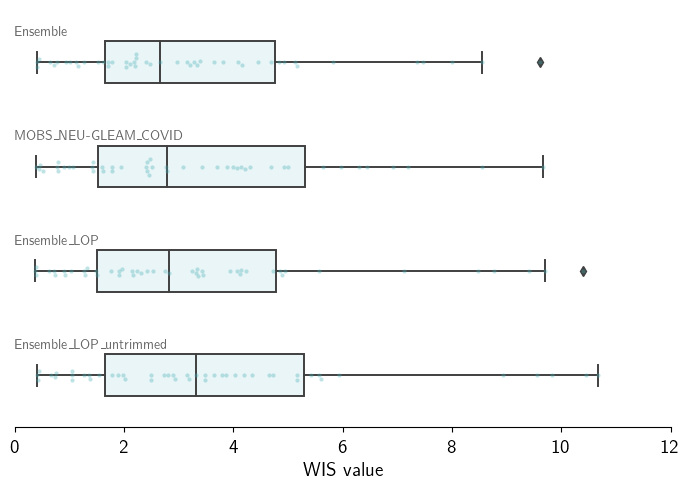

In [616]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

my_order = df.groupby(by=['Model'])['WIS'].median().sort_values(ascending=True).index
g = sns.boxplot(x='WIS', y='Model', data=df,order=my_order, color = '#17B1BF',width=.4)


#plt.axvline(x=1, ymin=0, ymax=3,linestyle='--', color = 'lightgray', alpha=1)
for patch in ax.patches:
    r, gr, b, a = patch.get_facecolor()
    patch.set_facecolor((r, gr, b, .1))

    
sns.swarmplot(x='WIS', y='Model', data=df,order=my_order,color = "#49AFB7",alpha = .35,size=3, orient="h")    

g.set(ylabel=None)
g.set(yticklabels=[])
g.set(yticks=[])

g.set(xlabel='WIS value ')


plt.xlim([0,12]) # cuts off some outliers

a = 0
for mod in list(my_order):
    plt.text(0.01,a-.25, mod, fontsize=10, style='italic', color='dimgray')
    a+=1
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)



#plt.suptitle(r'Rescaled WIS values for Death Predictions, all Rounds and Locations', fontsize=14)
plt.tight_layout()
#plt.savefig('baselinecomp_WISvals_flusight.pdf')
plt.show()

#should be rescaled if comparing states etc

# Aggregate Forecast hub to month

In [721]:
model = 'COVIDhub-baseline'
rd=17
preddays = pd.read_parquet(f'./dat/{model}_all_rd{rd}.pq')

In [722]:
preddays

,forecast_date,target,target_end_date,location,type,quantile,value
0,2023-03-20,27 day ahead inc hosp,2023-04-16,01,quantile,0.010,0.0
1,2023-03-20,27 day ahead inc hosp,2023-04-16,01,quantile,0.025,0.0
2,2023-03-20,27 day ahead inc hosp,2023-04-16,01,quantile,0.050,0.0
3,2023-03-20,27 day ahead inc hosp,2023-04-16,01,quantile,0.100,0.0
4,2023-03-20,27 day ahead inc hosp,2023-04-16,01,quantile,0.150,0.0
...,...,...,...,...,...,...,...
628315,2023-08-07,1 day ahead inc hosp,2023-08-08,US,point,NaN,1443.0
628316,2023-08-07,2 day ahead inc hosp,2023-08-09,US,point,NaN,1443.0
628317,2023-08-07,3 day ahead inc hosp,2023-08-10,US,point,NaN,1443.0
628318,2023-08-07,4 day ahead inc hosp,2023-08-11,US,point,NaN,1443.0


In [620]:
# group by epiweek and quantile

In [624]:
start_week = Week(2023,16)
end_week = Week(2023,32)

In [723]:
preddays[preddays.target_end_date == pd.to_datetime('2023-07-11')].target.unique()

array(['22 day ahead inc hosp', '15 day ahead inc hosp',
       '8 day ahead inc hosp', '1 day ahead inc hosp'], dtype=object)

In [724]:
predahead = preddays[(preddays.target == '8 day ahead inc hosp') | (preddays.target == '9 day ahead inc hosp') |
           (preddays.target == '10 day ahead inc hosp') | (preddays.target == '11 day ahead inc hosp') |
           (preddays.target == '12 day ahead inc hosp') | (preddays.target == '13 day ahead inc hosp') |
           (preddays.target == '14 day ahead inc hosp')]

predahead['week'] = predahead['target_end_date'].apply(Week.fromdate) # transform into epiweek

In [725]:
predahead

,forecast_date,target,target_end_date,location,type,quantile,value,week
14520,2023-04-03,13 day ahead inc hosp,2023-04-16,01,quantile,0.010,0.0,202316
14521,2023-04-03,13 day ahead inc hosp,2023-04-16,01,quantile,0.025,0.0,202316
14522,2023-04-03,13 day ahead inc hosp,2023-04-16,01,quantile,0.050,0.0,202316
14523,2023-04-03,13 day ahead inc hosp,2023-04-16,01,quantile,0.100,0.0,202316
14524,2023-04-03,13 day ahead inc hosp,2023-04-16,01,quantile,0.150,0.0,202316
...,...,...,...,...,...,...,...,...
621715,2023-07-31,8 day ahead inc hosp,2023-08-08,US,point,NaN,1274.0,202332
621716,2023-07-31,9 day ahead inc hosp,2023-08-09,US,point,NaN,1274.0,202332
621717,2023-07-31,10 day ahead inc hosp,2023-08-10,US,point,NaN,1274.0,202332
621718,2023-07-31,11 day ahead inc hosp,2023-08-11,US,point,NaN,1274.0,202332


In [732]:
Week(2023, 16).enddate()

datetime.date(2023, 4, 22)

In [726]:
# now want to aggregate quantiles with same epiweek
locs = list(predahead.location.unique())
locs.remove('60')
locs.remove('78')
locs.remove('72')
predagg = pd.DataFrame()
for week in predahead.week.unique():
    for loc in locs:
        for quant in predahead['quantile'].unique():
            if np.isnan(quant):
                p = predahead[(predahead.week == week) & (predahead.location == loc) & (predahead['type'] == 'point')]
            else:
                p = predahead[(predahead.week == week) & (predahead.location == loc) & (predahead['quantile'] == quant)]
            
            val = p.value.sum()
            
            newrow = pd.DataFrame({'target_week':week, 'location':loc, 'quantile':quant, 'type':p['type'].unique()[0],
                                  'value': val, 'target': 'inc hosp'}, index=[0])
            
            predagg = pd.concat([predagg, newrow])
            
predagg['Model'] = model

In [728]:
predagg

,target_week,location,quantile,type,value,target,Model
0,202316,01,0.010,quantile,0.000000,inc hosp,COVIDhub-baseline
0,202316,01,0.025,quantile,0.000000,inc hosp,COVIDhub-baseline
0,202316,01,0.050,quantile,0.000000,inc hosp,COVIDhub-baseline
0,202316,01,0.100,quantile,0.000000,inc hosp,COVIDhub-baseline
0,202316,01,0.150,quantile,0.000000,inc hosp,COVIDhub-baseline
...,...,...,...,...,...,...,...
0,202332,US,0.900,quantile,33118.469101,inc hosp,COVIDhub-baseline
0,202332,US,0.950,quantile,40600.906797,inc hosp,COVIDhub-baseline
0,202332,US,0.975,quantile,47298.859641,inc hosp,COVIDhub-baseline
0,202332,US,0.990,quantile,55414.503189,inc hosp,COVIDhub-baseline


In [727]:
predagg.to_pickle('COVIDhub-baseline_aggregated14day_hosp_rd17.pkl')

# calculate wis for reference models 

In [730]:
predagg_baseline = pd.read_pickle('COVIDhub-baseline_aggregated14day_hosp_rd17.pkl')
predagg_ensemble = pd.read_pickle('COVIDhub-ensemble_aggregated14day_hosp_rd17.pkl')

In [800]:
# regular wis, not normalized/rescaled




target = 'hosp'
ind = 0

predrd = predagg_ensemble


# regular wis, not normalized/rescaled

median_ensembles = dict()


#predsall = [predictions_rd5]
ind = 0


rd = 17

start_week = Week(2023,16)
end_week = Week(2023,31)
max_date = pd.to_datetime('2023-07-29')

ind += 1

predrd['target_end_date'] = predrd['target_week'].apply(Week.enddate)


models = list(predrd.Model.unique())

for target in ['hosp']:
#for target in [ 'hosp']:


    #models = list(predrd.Model.unique())

    median_ensembles = dict()

    df = pd.DataFrame(columns=['Model', 'WIS','Location', 'Target'])

   # loclist2 = ['02']
    for l in loclist:

        median_ensembles[l] = {}


        incidence = True
        target_location = l


        if target == 'hosp':
            target_obs = 'hospitalization'
        elif target == 'death':
            target_obs = 'death_new'
        else:
            target_obs = target

        observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
        observations['date'] = pd.to_datetime(observations['date'])

        #filter start - end week
        observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                                (observations['date'] <= pd.to_datetime(end_week.enddate()))]

        observations = observations[observations['location'] == target_location]
        
        #aggregate to weekly
        observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

        if max_date:
            observations = observations[observations['date'] <= max_date].copy()

        #transform to Observation object
        observations = Observations(observations)

        locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
        location_mapping = dict()
        for loc in locations['location']:
            location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]


        target_prediction_list = [f"{'inc' if incidence else 'cum'} {target}"]

        for model in models:    
            try:
                predictions = predrd[predrd.Model == model]
                predictions['target_end_date'] = pd.to_datetime(predictions['target_end_date'])
                predictions = predictions[predictions.location != 'US']
                predictions = predictions.astype({'location':'int'})


                locations = locations[locations.location != 'US']
                locations = locations.astype({'location':'int'})

                predictions = predictions.merge(locations, how='inner', on='location')

                target_locations = int(target_location)

                pred = predictions[predictions['location'] == int(target_location)].copy()

                #filter target
                pred = pred[(pred['target'].isin(target_prediction_list))]

                #filter max date
                if max_date:
                    pred = pred[pred['target_end_date'] <= max_date]

                if len(pred) == 0:
                    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

                
                predictions_list = [Predictions(pred, t_col='target_end_date')]

                labels = [model]


                aggregated_scores = dict()

                for label,predictions in zip(labels,predictions_list):
                    d,_ = score_utils.all_scores_from_df(observations, predictions, mismatched_allowed=False)


                    aggregated_scores[label] = d

                aggregated_data = defaultdict(list)
                for label in [model]:
                    aggregated_data['Case'] += [label]
                    aggregated_data['WIS'] += [aggregated_scores[label]['wis_mean']]

                    agg_data_df = pd.DataFrame(aggregated_data)
                    agg_data_df['Model'] = model
                    wisval = agg_data_df.WIS[0]



                locname = list(pred.location_name.unique())[0]


                new_row = {'Model':model, 'WIS':wisval,'Location': locname, 'Target':target}

                df = df.append(new_row, ignore_index=True)


            except Exception as e:
                print(e) 

                
df.to_pickle(f'{model}_WIS_rd{rd}.pkl')

In [801]:
df.head()

,Model,WIS,Location,Target
0,COVIDhub-ensemble,28.383333,Alabama,hosp
1,COVIDhub-ensemble,7.159101,Alaska,hosp
2,COVIDhub-ensemble,34.987797,Arizona,hosp
3,COVIDhub-ensemble,16.454087,Arkansas,hosp
4,COVIDhub-ensemble,174.857362,California,hosp


In [802]:
predictions_list[0]

,target_week,location,quantile,type,value,target,Model,target_end_date,abbreviation,location_name,population
0,202316,56,0.010,quantile,0,inc hosp,COVIDhub-ensemble,2023-04-22,WY,Wyoming,578759
1,202316,56,NaN,point,19,inc hosp,COVIDhub-ensemble,2023-04-22,WY,Wyoming,578759
2,202316,56,0.990,quantile,88,inc hosp,COVIDhub-ensemble,2023-04-22,WY,Wyoming,578759
3,202316,56,0.975,quantile,74,inc hosp,COVIDhub-ensemble,2023-04-22,WY,Wyoming,578759
4,202316,56,0.950,quantile,62,inc hosp,COVIDhub-ensemble,2023-04-22,WY,Wyoming,578759
...,...,...,...,...,...,...,...,...,...,...,...
355,202330,56,0.025,quantile,0,inc hosp,COVIDhub-ensemble,2023-07-29,WY,Wyoming,578759
356,202330,56,0.010,quantile,0,inc hosp,COVIDhub-ensemble,2023-07-29,WY,Wyoming,578759
357,202330,56,0.990,quantile,77,inc hosp,COVIDhub-ensemble,2023-07-29,WY,Wyoming,578759
358,202330,56,0.450,quantile,7,inc hosp,COVIDhub-ensemble,2023-07-29,WY,Wyoming,578759


# make WIS ratios

In [874]:
megawis = pd.read_pickle(f'megaround_wis_hosp_rd17.pkl')  # 4/22 until 7/29
baselinewis = pd.read_pickle(f'COVIDhub-baseline_WIS_rd17.pkl')
ensemblewis = pd.read_pickle(f'COVIDhub-ensemble_WIS_rd17.pkl')

In [875]:
baselinewisratio = megawis.merge(baselinewis, how='inner', on='Location')
baselinewisratio['WIS_ratio'] = baselinewisratio['WIS_x']/baselinewisratio['WIS_y']

ensemblewisratio = megawis.merge(ensemblewis, how='inner', on='Location')
ensemblewisratio['WIS_ratio'] = ensemblewisratio['WIS_x']/ensemblewisratio['WIS_y']

baselinewisratio.to_pickle(f'baseline_WISratio_rd17.pkl')
ensemblewisratio.to_pickle(f'ensemble_WISratio_rd17.pkl')

In [876]:
baselinewisratio

,Model_x,WIS_x,Location,Label,Target_x,Model_y,WIS_y,Target_y,WIS_ratio
0,Ensemble_LOP,17.631698,Alabama,Median aggregate,hosp,COVIDhub-baseline,88.036297,hosp,0.200278
1,Ensemble_LOP_untrimmed,20.195606,Alabama,Median aggregate,hosp,COVIDhub-baseline,88.036297,hosp,0.229401
2,Ensemble,14.488364,Alabama,Median aggregate,hosp,COVIDhub-baseline,88.036297,hosp,0.164573
3,MOBS_NEU-GLEAM_COVID,38.620051,Alabama,Median aggregate,hosp,COVIDhub-baseline,88.036297,hosp,0.438683
4,JHU_IDD-CovidSP,57.622083,Alabama,Median aggregate,hosp,COVIDhub-baseline,88.036297,hosp,0.654526
...,...,...,...,...,...,...,...,...,...
402,MOBS_NEU-GLEAM_COVID,6.584637,Wyoming,Median aggregate,hosp,COVIDhub-baseline,16.464004,hosp,0.399941
403,JHU_IDD-CovidSP,4.870165,Wyoming,Median aggregate,hosp,COVIDhub-baseline,16.464004,hosp,0.295807
404,NotreDame-FRED,7.512341,Wyoming,Median aggregate,hosp,COVIDhub-baseline,16.464004,hosp,0.456289
405,UTA-ImmunoSEIRS,8.475482,Wyoming,Median aggregate,hosp,COVIDhub-baseline,16.464004,hosp,0.514789


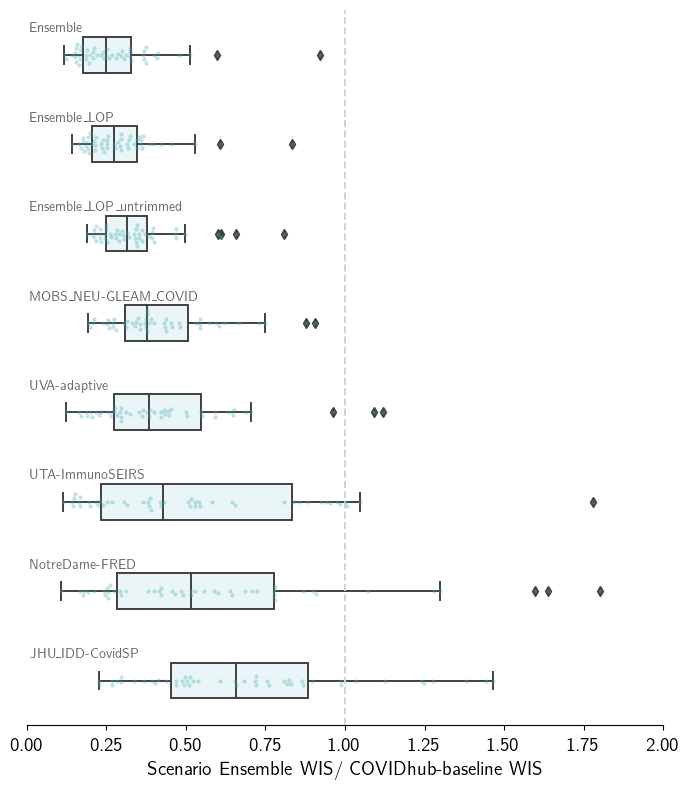

In [883]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)

my_order = baselinewisratio.groupby(by=['Model_x'])['WIS_ratio'].median().sort_values(ascending=True).index
g = sns.boxplot(x='WIS_ratio', y='Model_x', data=baselinewisratio,order=my_order, color = '#17B1BF',width=.4)


plt.axvline(x=1, ymin=0, ymax=3,linestyle='--', color = 'lightgray', alpha=1)
for patch in ax.patches:
    r, gr, b, a = patch.get_facecolor()
    patch.set_facecolor((r, gr, b, .1))

    
sns.swarmplot(x='WIS_ratio', y='Model_x', data=baselinewisratio,order=my_order,color = "#49AFB7",alpha = .35,size=3, orient="h")    

g.set(ylabel=None)
g.set(yticklabels=[])
g.set(yticks=[])

g.set(xlabel='Scenario Ensemble WIS/ COVIDhub-baseline WIS ')


plt.xlim([0,2]) # cuts off some outliers

a = 0
for mod in list(my_order):
    plt.text(0.01,a-.25, mod, fontsize=10, style='italic', color='dimgray')
    a+=1
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)



#plt.suptitle(r'Rescaled WIS values for Death Predictions, all Rounds and Locations', fontsize=14)
plt.tight_layout()
plt.savefig('baselinecomp_WISvals_rd17.pdf')
plt.show()

#should be rescaled if comparing states etc

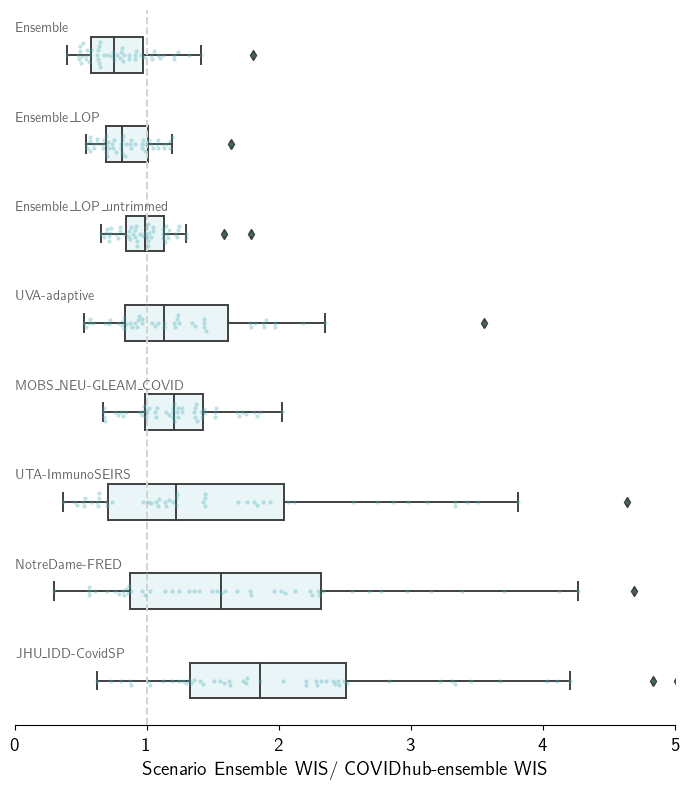

In [884]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)

my_order = ensemblewisratio.groupby(by=['Model_x'])['WIS_ratio'].median().sort_values(ascending=True).index
g = sns.boxplot(x='WIS_ratio', y='Model_x', data=ensemblewisratio,order=my_order, color = '#17B1BF',width=.4)


plt.axvline(x=1, ymin=0, ymax=3,linestyle='--', color = 'lightgray', alpha=1)
for patch in ax.patches:
    r, gr, b, a = patch.get_facecolor()
    patch.set_facecolor((r, gr, b, .1))

    
sns.swarmplot(x='WIS_ratio', y='Model_x', data=ensemblewisratio,order=my_order,color = "#49AFB7",alpha = .35,size=3, orient="h")    

g.set(ylabel=None)
g.set(yticklabels=[])
g.set(yticks=[])

g.set(xlabel='Scenario Ensemble WIS/ COVIDhub-ensemble WIS ')

plt.xlim([0,5]) # cuts off some outliers

a = 0
for mod in list(my_order):
    plt.text(0.01,a-.25, mod, fontsize=10, style='italic', color='dimgray')
    a+=1
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)



#plt.suptitle(r'Rescaled WIS values for Death Predictions, all Rounds and Locations', fontsize=14)
plt.tight_layout()
plt.savefig('ensemblecomp_WISvals_rd17.pdf')
plt.show()


In [8]:
# calculate WIS for all scenarios

In [63]:
# regular wis, not normalized/rescaled



target = 'hosp'
ind = 0

predrd = predictions_rd17

loclist = list(predrd.location.unique())
loclist.remove('US')

# regular wis, not normalized/rescaled

median_ensembles = dict()


#predsall = [predictions_rd5]
ind = 0


rd = 17

start_week = Week(2023,16)
end_week = Week(2023,34)
max_date = pd.to_datetime('2023-08-27')

ind += 1


models = list(predrd.Model.unique())

for target in ['hosp']:
#for target in [ 'hosp']:


    #models = list(predrd.Model.unique())

    median_ensembles = dict()

    df = pd.DataFrame(columns=['Model', 'WIS','Location',  'Label'])

    #loclist2 = ['02']
    for l in loclist:

        median_ensembles[l] = {}


        incidence = True
        target_location = l


        if target == 'hosp':
            target_obs = 'hospitalization'
        elif target == 'death':
            target_obs = 'death_new'
        else:
            target_obs = target

        observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
        observations['date'] = pd.to_datetime(observations['date'])

        #filter start - end week
        observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                                (observations['date'] <= pd.to_datetime(end_week.enddate()))]


        #filter location
       # if int(target_location)<10:
        #    observations = observations[observations['location'] == target_location[1]]
        #else:
           # observations = observations[observations['location'] == target_location]
            
        observations = observations[observations['location'] == target_location]

        #aggregate to weekly
        observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

        if max_date:
            observations = observations[observations['date'] <= max_date].copy()

        #transform to Observation object
        observations = Observations(observations)


        max_pred = observations.date.unique()[-1]

        locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
        location_mapping = dict()
        for loc in locations['location']:
            location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]


        target_prediction_list = [f"{'inc' if incidence else 'cum'} {target}"]

        for model in models:    
            try:
                predictions = predrd[predrd.Model == model]
                predictions['target_end_date'] = pd.to_datetime(predictions['target_end_date'])
                predictions = predictions[predictions.location != 'US']
                predictions = predictions.astype({'location':'int'})
                predictions = predictions.astype({'quantile':'float'})


                locations = locations[locations.location != 'US']
                locations = locations.astype({'location':'int'})

                predictions = predictions.merge(locations, how='inner', on='location')

                target_locations = int(target_location)

                pred = predictions[predictions['location'] == int(target_location)].copy()

                #filter target
                pred = pred[(pred['target'].isin(target_prediction_list))]

                #filter max date
                if max_pred:
                    pred = pred[pred['target_end_date'] <= max_pred]

                if len(pred) == 0:
                    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

                scenarios = list(pred['scenario_id'].drop_duplicates())
                predictions_list = [Predictions(pred[pred['scenario_id'] == scenario], t_col='target_end_date') for scenario in scenarios]
                med_ensemble_predictions = median_ensemble(predictions_list)
                median_ensembles[l][model] = med_ensemble_predictions

                predictions_list += [med_ensemble_predictions]

                labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Median aggregate"]


                aggregated_scores = dict()

                for label,predictions in zip(labels,predictions_list):
                    d,_ = score_utils.all_scores_from_df(observations, predictions, mismatched_allowed=False)


                    aggregated_scores[label] = d

                aggregated_data = defaultdict(list)
                for label in labels:
                    aggregated_data['Case'] += [label]
                    aggregated_data['WIS'] += [aggregated_scores[label]['wis_mean']]

                    agg_data_df = pd.DataFrame(aggregated_data)
                    agg_data_df['Model'] = model
                    wisval = list(agg_data_df[agg_data_df.Case == label].WIS)[0]


                    locname = list(pred.location_name.unique())[0]


                    new_row = {'Model':model, 'WIS':wisval,'Location': locname,  'Label':label, 'Target':target}

                    df = df.append(new_row, ignore_index=True)


            except Exception as e:
                print(e) 



There are no predictions for model UTA-ImmunoSEIRS at location 11


In [64]:
df

,Model,WIS,Location,Label,Target
0,Ensemble_LOP,50.703935,Alabama,Scenario A,hosp
1,Ensemble_LOP,43.356158,Alabama,Scenario B,hosp
2,Ensemble_LOP,50.705201,Alabama,Scenario C,hosp
3,Ensemble_LOP,44.448935,Alabama,Scenario D,hosp
4,Ensemble_LOP,51.763724,Alabama,Scenario E,hosp
...,...,...,...,...,...
2844,UVA-adaptive,14.098192,Wyoming,Scenario C,hosp
2845,UVA-adaptive,13.270423,Wyoming,Scenario D,hosp
2846,UVA-adaptive,14.098192,Wyoming,Scenario E,hosp
2847,UVA-adaptive,13.270423,Wyoming,Scenario F,hosp


In [66]:
df.to_pickle(f'megaround_wis_{target}_rd{rd}_scenarios.pkl') 

In [65]:
observations

,location,date,value
0,56,2023-04-22,15
1,56,2023-04-29,13
2,56,2023-05-06,15
3,56,2023-05-13,9
4,56,2023-05-20,20
5,56,2023-05-27,12
6,56,2023-06-03,22
7,56,2023-06-10,17
8,56,2023-06-17,10
9,56,2023-06-24,15


In [29]:
pd.read_pickle(f'megaround_wis_{target}_rd{rd}_scenarios.pkl') 

,Model,WIS,Location,Label,Target
0,Ensemble_LOP,29.192169,Alabama,Scenario A,hosp
1,Ensemble_LOP,25.294411,Alabama,Scenario B,hosp
2,Ensemble_LOP,28.826236,Alabama,Scenario C,hosp
3,Ensemble_LOP,25.892345,Alabama,Scenario D,hosp
4,Ensemble_LOP,29.459448,Alabama,Scenario E,hosp
...,...,...,...,...,...
2844,UVA-adaptive,12.345038,Wyoming,Scenario C,hosp
2845,UVA-adaptive,11.419885,Wyoming,Scenario D,hosp
2846,UVA-adaptive,12.345038,Wyoming,Scenario E,hosp
2847,UVA-adaptive,11.419885,Wyoming,Scenario F,hosp


In [31]:
# normalized WIS by standard deviation



target = 'hosp'
ind = 0

predrd = predictions_rd17

loclist = list(predrd.location.unique())
loclist.remove('US')

median_ensembles = dict()


#predsall = [predictions_rd5]
ind = 0


rd = 17

start_week = Week(2023,16)
end_week = Week(2023,32)
max_date = pd.to_datetime('2023-08-12')

ind += 1


models = list(predrd.Model.unique())

for target in ['hosp']:
#for target in [ 'hosp']:


    #models = list(predrd.Model.unique())

    median_ensembles = dict()

    df = pd.DataFrame(columns=['Model', 'WIS','Location',  'Label'])

    #loclist2 = ['02']
    for l in loclist:

        median_ensembles[l] = {}


        incidence = True
        target_location = l


        if target == 'hosp':
            target_obs = 'hospitalization'
        elif target == 'death':
            target_obs = 'death_new'
        else:
            target_obs = target

        observations = pd.read_parquet(f"./dat/truth_{'inc' if incidence else 'cum'}_{target_obs}.pq")
        observations['date'] = pd.to_datetime(observations['date'])

        #filter start - end week
        observations = observations[(observations['date'] >= pd.to_datetime(start_week.startdate())) & 
                                (observations['date'] <= pd.to_datetime(end_week.enddate()))]


        #filter location
       # if int(target_location)<10:
        #    observations = observations[observations['location'] == target_location[1]]
        #else:
           # observations = observations[observations['location'] == target_location]
            
        observations = observations[observations['location'] == target_location]

        #aggregate to weekly
        observations = observations.groupby(['location', pd.Grouper(key='date', freq='W-SAT')]).sum().reset_index()

        if max_date:
            observations = observations[observations['date'] <= max_date].copy()

        #transform to Observation object
        observations = Observations(observations)


        max_pred = observations.date.unique()[-1]

        locations = pd.read_csv('./dat/locations.csv',dtype={'location':str})
        location_mapping = dict()
        for loc in locations['location']:
            location_mapping[loc] = locations[locations['location'] == loc]['abbreviation'].unique()[0]


        target_prediction_list = [f"{'inc' if incidence else 'cum'} {target}"]

        for model in models:    
            try:
                predictions = predrd[predrd.Model == model]
                predictions['target_end_date'] = pd.to_datetime(predictions['target_end_date'])
                predictions = predictions[predictions.location != 'US']
                predictions = predictions.astype({'location':'int'})
                predictions = predictions.astype({'quantile':'float'})


                locations = locations[locations.location != 'US']
                locations = locations.astype({'location':'int'})

                predictions = predictions.merge(locations, how='inner', on='location')

                target_locations = int(target_location)

                pred = predictions[predictions['location'] == int(target_location)].copy()

                #filter target
                pred = pred[(pred['target'].isin(target_prediction_list))]

                #filter max date
                if max_pred:
                    pred = pred[pred['target_end_date'] <= max_pred]

                if len(pred) == 0:
                    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

                scenarios = list(pred['scenario_id'].drop_duplicates())
                predictions_list = [Predictions(pred[pred['scenario_id'] == scenario], t_col='target_end_date') for scenario in scenarios]
                med_ensemble_predictions = median_ensemble(predictions_list)
                median_ensembles[l][model] = med_ensemble_predictions

                predictions_list += [med_ensemble_predictions]

                labels = ["Scenario " + scenario[0] for scenario in sorted(scenarios)] + ["Median aggregate"]


                aggregated_scores = dict()

                for label,predictions in zip(labels,predictions_list):
                    d = score_utils.all_timestamped_scores_from_df(observations, predictions)
                    

                    aggregated_scores[label] = d

                for label in labels:
                    medagg = aggregated_scores[label]
                    
                    wisvals = list(medagg.wis)
                    dates = list(medagg.date)
                    

                    locname = list(pred.location_name.unique())[0]
    
                    for date in range(len(dates)):
                        new_row = {'Model':model, 'WIS':wisvals[date],'Location': locname,  'Label':label,
                                   'Target':target, 'Round':rd, 'Date':dates[date]}

                        df = df.append(new_row, ignore_index=True)


            except Exception as e:
                print(e) 



There are no predictions for model UTA-ImmunoSEIRS at location 11


In [68]:
Predictions(predictions, t_col='target_end_date')

,target_end_date,type,quantile,horizon,location,value,population
0,2023-04-22,quantile,0.01,1.0,56.0,5.5,578759.0
1,2023-04-22,quantile,0.25,1.0,56.0,6.5,578759.0
2,2023-04-22,quantile,0.40,1.0,56.0,7.0,578759.0
3,2023-04-22,quantile,0.35,1.0,56.0,7.0,578759.0
4,2023-04-22,quantile,0.30,1.0,56.0,6.5,578759.0
...,...,...,...,...,...,...,...
432,2023-08-26,quantile,0.65,19.0,56.0,0.0,578759.0
433,2023-08-26,quantile,0.60,19.0,56.0,0.0,578759.0
434,2023-08-26,quantile,0.45,19.0,56.0,0.0,578759.0
435,2023-08-26,quantile,0.20,19.0,56.0,0.0,578759.0


In [33]:
df

,Model,WIS,Location,Label,Date,Round,Target
0,Ensemble_LOP,7.830957,Alabama,Scenario A,2023-04-22,17.0,hosp
1,Ensemble_LOP,14.899673,Alabama,Scenario A,2023-04-29,17.0,hosp
2,Ensemble_LOP,12.035882,Alabama,Scenario A,2023-05-06,17.0,hosp
3,Ensemble_LOP,8.534622,Alabama,Scenario A,2023-05-13,17.0,hosp
4,Ensemble_LOP,10.084405,Alabama,Scenario A,2023-05-20,17.0,hosp
...,...,...,...,...,...,...,...
48428,UVA-adaptive,12.000000,Wyoming,Median aggregate,2023-07-15,17.0,hosp
48429,UVA-adaptive,10.000000,Wyoming,Median aggregate,2023-07-22,17.0,hosp
48430,UVA-adaptive,13.000000,Wyoming,Median aggregate,2023-07-29,17.0,hosp
48431,UVA-adaptive,14.000000,Wyoming,Median aggregate,2023-08-05,17.0,hosp


In [34]:
df.to_pickle(f'megaround_wis_norm_{target}_rd{rd}_scenarios_weeks.pkl') 

In [35]:
dfwisnorm = pd.read_pickle(f'megaround_wis_norm_{target}_rd{rd}_scenarios_weeks.pkl') 

In [53]:
dfwisnorm = pd.read_pickle(f'megaround_wis_norm_{target}_rd{rd}_scenarios_weeks.pkl') 
wisdfstd = pd.DataFrame()
for loc in dfwisnorm.Location.unique():
    for label in dfwisnorm.Label.unique():  
        for date in dfwisnorm.Date.unique():
            dffilt = dfwisnorm[(dfwisnorm.Location == loc) & (dfwisnorm.Label == label) & (dfwisnorm.Date == date) ]

            stdev = dffilt['WIS'].std()
                
            dffilt['WISscale'] = dffilt['WIS'] / stdev

            
            wisdfstd = pd.concat([wisdfstd, dffilt])

 


In [54]:
wisdfstd

,Model,WIS,Location,Label,Date,Round,Target,WISscale
0,Ensemble_LOP,7.830957,Alabama,Scenario A,2023-04-22,17.0,hosp,0.440929
119,Ensemble_LOP_untrimmed,10.382214,Alabama,Scenario A,2023-04-22,17.0,hosp,0.584580
238,Ensemble,6.509194,Alabama,Scenario A,2023-04-22,17.0,hosp,0.366506
357,MOBS_NEU-GLEAM_COVID,15.151370,Alabama,Scenario A,2023-04-22,17.0,hosp,0.853112
476,JHU_IDD-CovidSP,55.129292,Alabama,Scenario A,2023-04-22,17.0,hosp,3.104106
...,...,...,...,...,...,...,...,...
47956,MOBS_NEU-GLEAM_COVID,13.773978,Wyoming,Median aggregate,2023-08-12,17.0,hosp,2.796591
48075,JHU_IDD-CovidSP,5.869326,Wyoming,Median aggregate,2023-08-12,17.0,hosp,1.191675
48194,NotreDame-FRED,3.951235,Wyoming,Median aggregate,2023-08-12,17.0,hosp,0.802236
48313,UTA-ImmunoSEIRS,14.976243,Wyoming,Median aggregate,2023-08-12,17.0,hosp,3.040692


In [58]:
wisdfstd.Date.unique()

array(['2023-04-22T00:00:00.000000000', '2023-04-29T00:00:00.000000000',
       '2023-05-06T00:00:00.000000000', '2023-05-13T00:00:00.000000000',
       '2023-05-20T00:00:00.000000000', '2023-05-27T00:00:00.000000000',
       '2023-06-03T00:00:00.000000000', '2023-06-10T00:00:00.000000000',
       '2023-06-17T00:00:00.000000000', '2023-06-24T00:00:00.000000000',
       '2023-07-01T00:00:00.000000000', '2023-07-08T00:00:00.000000000',
       '2023-07-15T00:00:00.000000000', '2023-07-22T00:00:00.000000000',
       '2023-07-29T00:00:00.000000000', '2023-08-05T00:00:00.000000000',
       '2023-08-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [55]:
wisdfavg = pd.DataFrame()
for loc in wisdfstd.Location.unique():
    for label in wisdfstd.Label.unique():
        for model in wisdfstd.Model.unique():
            
            
            dffilt = wisdfstd[(wisdfstd.Location == loc) & (wisdfstd.Label == label) & (wisdfstd.Model ==model)]
            
            WISavg = dffilt.WISscale.mean()
            
            newrow = pd.DataFrame({'Model':model, 'Location':loc, 'Label':label, 'Round':17, 'Target':target, 
                                  'WISavg': WISavg}, index=[0])
            
            wisdfavg = pd.concat([wisdfavg, newrow])
            
wisdfavg = wisdfavg.reset_index()
wisdfavg = wisdfavg.drop(columns=['index'])    

            

In [56]:
wisdfavg

,Model,Location,Label,Round,Target,WISavg
0,Ensemble_LOP,Alabama,Scenario A,17,hosp,0.987560
1,Ensemble_LOP_untrimmed,Alabama,Scenario A,17,hosp,1.053315
2,Ensemble,Alabama,Scenario A,17,hosp,0.871275
3,MOBS_NEU-GLEAM_COVID,Alabama,Scenario A,17,hosp,2.080647
4,JHU_IDD-CovidSP,Alabama,Scenario A,17,hosp,2.036692
...,...,...,...,...,...,...
2851,MOBS_NEU-GLEAM_COVID,Wyoming,Median aggregate,17,hosp,2.265431
2852,JHU_IDD-CovidSP,Wyoming,Median aggregate,17,hosp,1.677450
2853,NotreDame-FRED,Wyoming,Median aggregate,17,hosp,2.656221
2854,UTA-ImmunoSEIRS,Wyoming,Median aggregate,17,hosp,2.916557


In [57]:
wisdfavg.to_pickle(f'megaround_wis_norm_{target}_rd{rd}_scenarios_avg.pkl')

In [50]:
a = pd.read_pickle(f'megaround_wis_{target}_rd{rd}_scenarios_avg.pkl') 

In [52]:
a.Model.unique()

array(['Ensemble_LOP', 'Ensemble_LOP_untrimmed', 'Ensemble',
       'MOBS_NEU-GLEAM_COVID', 'JHU_IDD-CovidSP', 'NotreDame-FRED',
       'UTA-ImmunoSEIRS', 'UVA-adaptive'], dtype=object)